<h2>Multi Class Classification for Iris Dataset</h2>
<img width="300" height="100" src="iris_dim.png" />


### Importing libraries and Iris dataset

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame = True)

In [5]:
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [6]:
df = iris.data

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df1 = iris.frame 
# This gives you a ready-to-use DataFrame with all features and target values.

In [9]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df1.target.unique()

array([0, 1, 2])

In [13]:
df1.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [29]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

This corresponds by index to the values in df1.target:

df1.target value	iris.target_names label
0	'setosa'
1	'versicolor'
2	'virginica'

In [16]:
df1.shape

(150, 5)

In [17]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [19]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Data Visulaization 

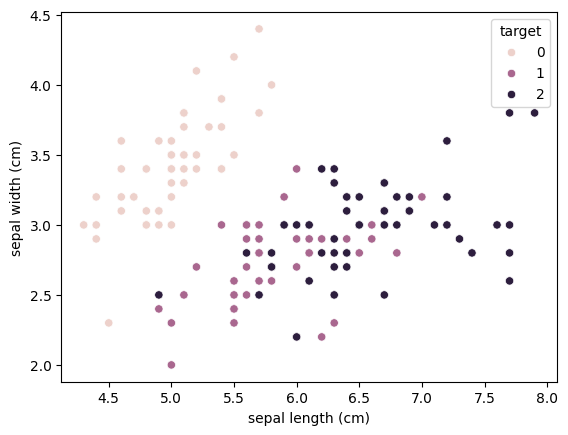

In [23]:
sns.scatterplot(data=df1, x='sepal length (cm)', y='sepal width (cm)',hue='target')
plt.show()

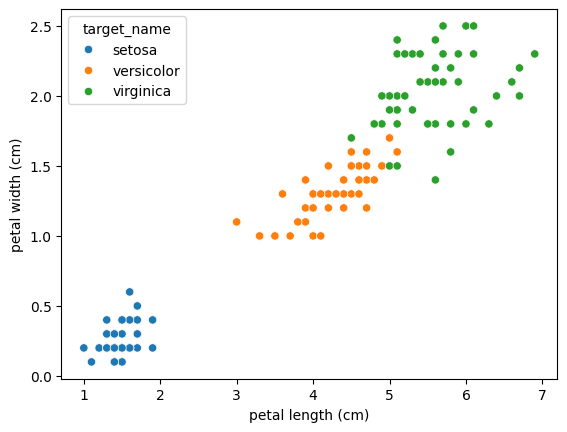

In [32]:
sns.scatterplot(data=df1, x='petal length (cm)', y='petal width (cm)',hue='target_name')
plt.show()

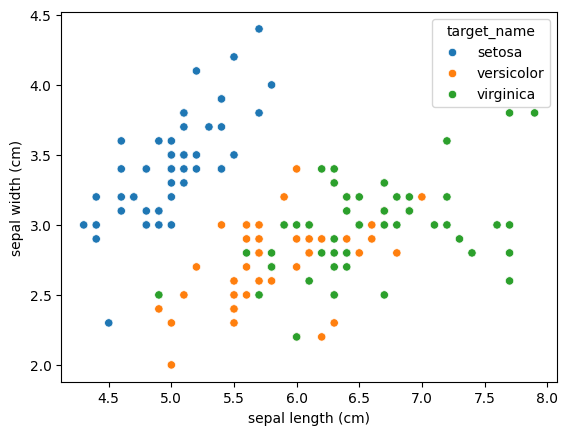

In [30]:
sns.scatterplot(data=df1, x='sepal length (cm)', y='sepal width (cm)',hue='target_name')
plt.show()

In [26]:
df1['target_name'] = df1['target'].map({0:'setosa', 1 : 'versicolor', 2 : 'virginica' }) 

In [27]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [33]:
df1.columns


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_name'],
      dtype='object')

In [34]:
X = df1[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
y = df1['target'] 


In [35]:
X.shape , y.shape

((150, 4), (150,))

### TRAIN AND TEST SPLIT

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=5)
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9777777777777777

In [39]:
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, accuracy_score
report = classification_report(y_test,y_pred)
print(report)
accuracy = accuracy_score(y_test , y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

0.9777777777777777


### Confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm


array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 14]])

Text(50.722222222222214, 0.5, 'Truth')

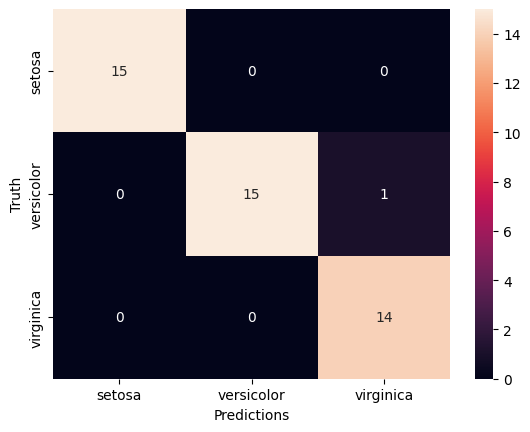

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
classes = ['setosa', 'versicolor', 'virginica']
sns.heatmap(cm,annot=True,xticklabels = classes, yticklabels = classes)
plt.xlabel('Predictions')
plt.ylabel('Truth') 